<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B03042019_2%5D_FHI_RT_BH_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocess

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import zipfile

# 將下載到的資料集解壓縮至/tmp
local_zip = '/content/gdrive/My Drive/Keras/RTFILM.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/RTFILM')
zip_ref.close()

In [0]:
import numpy as np
import cv2

ok_img_list=[]
ok_label_list=[]
ng_img_list=[]
ng_label_list=[]
base_path = r'/content/RTFILM'

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".jpg"):
            filename = os.path.join(root, file)
            category_name = os.path.basename(root)  
            imarray = cv2.imread(filename,3)
            if category_name == 'OK':
              ok_img_list.append(imarray)
              ok_label_list.append(category_name)
            elif category_name == "NG":
              ng_img_list.append(imarray)
              ng_label_list.append(category_name)

In [5]:
print("ok_img_list - length ",len(ok_img_list))
print("ok_label_list - length",len(ok_label_list))
print("ok_img_list - contents ",ok_img_list[0])
print("ok_label_list - contents",ok_label_list[0])

ok_img_list - length  100
ok_label_list - length 100
ok_img_list - contents  [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
ok_label_list - contents OK


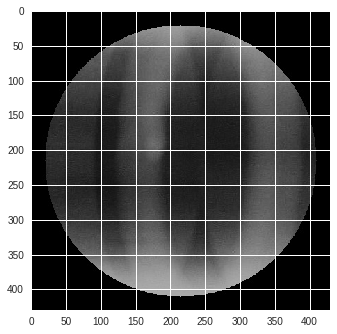

In [6]:
import matplotlib.pyplot as plt
plt.imshow(ok_img_list[0])
plt.show()

In [0]:
img_arr   = np.concatenate((ok_img_list, ng_img_list), axis = 0)
img_label = np.concatenate((ok_label_list, ng_label_list), axis = 0) 

In [0]:
from PIL import Image

for i in range(len(img_arr)):
  


In [21]:
print(img_label)
print(type(img_label))

['OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK' 'OK'
 'OK' 'OK' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG' 'NG'
 'NG' 

In [0]:
for i in range(len(img_label)):
  if img_label[i] == 'OK':
    img_label[i] = 1
  elif img_label[i] == 'NG':
    img_label[i] = 0

In [25]:
print(img_label)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0']


In [0]:
import random
temp = list(zip(img_arr, img_label))
random.shuffle(temp)
img_arr, img_label = zip(*temp)
img_arr=np.asarray(img_arr)
img_label=np.asarray(img_label)

In [36]:
print(img_label)
print(temp[0])

['1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1'
 '0' '0' '1' '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '0' '1' '1' '1' '1'
 '0' '0' '0' '1' '1' '0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '1' '1'
 '1' '0' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1'
 '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1'
 '0' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0'
 '0' '0' '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '0' '1' '0' '0'
 '0' '0' '1' '0' '1' '0' '1' '0' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1'
 '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0' '1' '1'
 '0' '1' '0' '1' '0' '1' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '1'
 '1' '0']
(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],


In [0]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(img_arr, img_label, test_size=0.2, random_state=42)

## Model Construction

In [34]:
#%% Create Model
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout2D, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
from keras.callbacks import EarlyStopping

# Generate model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128,128,3),padding='same',name='block1_conv2_1'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',name='block1_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block1_MaxPooling'))
model.add(SpatialDropout2D(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_1'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',name='block2_conv2_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='block2_MaxPooling'))
model.add(SpatialDropout2D(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',name='final_output_1'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',name='final_output_2'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid',name='class_output'))
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'
model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
EStop = EarlyStopping(monitor='val_acc', min_delta=0, 
                      patience=10, verbose=1, mode='auto')


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
